# Log Book 2

## The Three body problem

19/02/23

In this logbook I will be looking at the three body problem. We will be solving this by solving the equations of motion for the combined mass of objects 2 and 3 around mass 1 and then the orbits of objects 2 and 3 around thier centre of mass.

We will be using the Velocity Verlet method to propegate this three body through time.

We are setting constants such as G to 1.

In [1]:
#Import statements
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

For the initial conditions I originally got 
$$
x_2 = \frac{1 - \textit{m}_\textit{2} \times 0.025}{1 + m_2 + m_3}
$$
With an erroneus $m_2$ as opposed to $m_3$ in the numerator. This gave me an orbit that looked similar to the orbit I now have, however object 1 can be seen getting a flatter and flatter orbit which affects total energy as the potential oscillated with increasing amplitude over time.

### Calculation of initial values - corrected version

1/03/23

Want to place COM at origin, with all masses lined up in x direction with r12 = 1 and r13 = 1.0025, gives us equations:

$$ 
\frac{m_1 x_1 + m_2 x_2 + m_3 x_3}{m_1 + m_2 + m_3} = 0 
$$
$$
x_2 - x_1 = 1 \implies x_1 = x_2 - 1 
\newline
$$
$$
x_3 - x_2 = 0.025 \implies x_3 = 0.025 + x_2
$$
From this we can work out:
$$
x_2 = \frac{1 - m_3 \times 0.025}{1 + m_2 + m_3}
$$
Which means we can work out $x_2, x_3 $ and $  x_{23}$ (the distance between origin and centre of mass of object 2 and 3.

The velocity of mass 1 of these can then be calculated from:

$$ \frac{G m_1 m_{23}}{r_{1->COM}} = \frac{m_1 v_1^2}{r_{1->23}} $$

Where $r_{1->COM}$ is the vector between mass 1 and the centre of mass of the entire system (in this case the origin) and $r_{1->23}$ is the vector between mass 1 and mass 23.

In [2]:
# Defining constsants
G = 1
m1 = 1
m2 = 3e-6
m3 = 3.6e-8
m23 = m2 + m3

#Initial conditions
x2 = (1 - m3 * 0.0025)/(1 + m2 + m3)
x3 = 0.0025 + x2
x1 = x2 - 1.
x23 = (m2*x2 + m3*x3)/(m2 + m3)

v_x1 = -np.sqrt((m23 * -x1)/((x1-x23)**2))
v_x2 = np.sqrt((m3 * (x23-x2))/((x3-x2)**2))
v_x3 = -np.sqrt((m2 * (x3-x23))/((x3-x2)**2))
v_x23 = np.sqrt((m1 * x23)/((x1-x23)**2))


In [3]:
def force(r1,r2,m1,m2):
    """
    Calculates the gravitational force on mass m1 due to mass m2.
    Inputs:
    r1: Position of mass 1
    r2: Position of mass 2
    m1: Mass value of mass 1
    m2: Mass value of mass 2
    Returns:
    f_on_m1: The force on mass m1
    Global variables used:
    G: Value of gravitational constant
    """
    # Find r_12 and its magnitude
    
    r_12 = r2 - r1
    r_12_mag = np.linalg.norm(r_12)
    
    #Calculate the force
    f_on_m1 = (G * m1 * m2 * r_12)/(r_12_mag**3)
    return f_on_m1

In [4]:
# Setting up parameters
Ndim = 2     
Nsteps = 40
dt = 1/1000
Ntotal = int(Nsteps/dt) # Total number of data points of t
t_arr = np.linspace(0, Ntotal*dt, Ntotal+1)

# Set up storage for positions
r1 = np.zeros((Ntotal + 1, Ndim)) #[x, y]
r2 = np.zeros((Ntotal + 1, Ndim))
r3 = np.zeros((Ntotal + 1, Ndim))
r23 = np.zeros((Ntotal + 1, Ndim))

v1 = np.zeros((Ntotal + 1, Ndim)) #[Vx, Vy]
v2 = np.zeros((Ntotal + 1, Ndim))
v3 = np.zeros((Ntotal + 1, Ndim)) 
v23 = np.zeros((Ntotal + 1, Ndim))

# Set up storage for energies and angular momentum
KE1 = np.zeros(Ntotal) #Kinetic Energy 
PE1 = np.zeros(Ntotal) #Potential Energy 
L1 = np.zeros(Ntotal) #Angular momentum 

KE2 = np.zeros(Ntotal) 
PE2 = np.zeros(Ntotal) 
L2 = np.zeros(Ntotal) 

KE3 = np.zeros(Ntotal) 
PE3 = np.zeros(Ntotal) 
L3 = np.zeros(Ntotal) 

KE23 = np.zeros(Ntotal) 
PE23 = np.zeros(Ntotal) 
L23 = np.zeros(Ntotal) 



# Initial conditions (see below for explanation of these values)
r1[0] = np.array((x1, 0)) #[x, y]
r2[0] = np.array((x2, 0)) 
r3[0] = np.array((x3, 0))
r23[0] = np.array((x23, 0))

v1[0] = np.array((0, v_x1)) #[Vx, Vy]
v2[0] = np.array((0, v_x2))
v3[0] = np.array((0, v_x3))
v23[0] = np.array((0, v_x23))


In [5]:
#Verlet method
for i in range(Ntotal):
    # Find forces on masses at this timestep
    f1 = force(r1[i], r23[i], m1, m23)
    f23 = force(r23[i], r1[i], m23, m1)
    f2 = force(r2[i], r3[i], m2, m3)
    f3 = force(r3[i], r2[i], m3, m2)
    
    # Update positions using velocity Verlet
    r1[i+1] = r1[i] + dt*v1[i] + dt**2 * f1/(2*m1)
    r23[i+1] = r23[i] + dt*v23[i] + dt**2 * f23/(2*m23)
    r2[i+1] = r2[i] + dt*v2[i] + dt**2 * f2/(2*m2)
    r3[i+1] = r3[i] + dt*v3[i] + dt**2 * f3/(2*m3)
    
    # Find forces at new timestep (remember that you have to store previous forces)
    f1new = force(r1[i+1], r23[i+1], m1, m23)
    f23new = force(r23[i+1], r1[i+1], m23, m1)
    f2new = force(r2[i+1], r3[i+1], m2, m3)
    f3new = force(r3[i+1], r2[i+1], m3, m2)
    
    # Update velocities using velocity Verlet
    v1[i+1] = v1[i] + dt * (f1 + f1new)/(2*m1)
    v23[i+1] = v23[i] + dt * (f23 + f23new)/(2*m23)
    v2[i+1] = v2[i] + dt * (f2 + f2new)/(2*m2)
    v3[i+1] = v3[i] + dt * (f3 + f3new)/(2*m3)
    
    
    # Store energies
    KE1[i] =  1/2 * m1 * np.linalg.norm(v1[i])**2
    PE1[i] = - (G * m1 * m23)/np.linalg.norm(r23[i] - r1[i])
    L1[i] = m1 * np.linalg.norm(v1[i]) * np.linalg.norm(r1[i])
    
    KE2[i] =  1/2 * m2 * np.linalg.norm(v2[i])**2
    PE2[i] = - (G * m2 * m3)/np.linalg.norm(r3[i] - r2[i])
    L2[i] = m2 * np.linalg.norm(v2[i]) * np.linalg.norm(r2[i])
    
    KE3[i] =  1/2 * m3 * np.linalg.norm(v3[i])**2
    PE3[i] = - (G * m2 * m3)/np.linalg.norm(r2[i] - r3[i])
    L3[i] = m3 * np.linalg.norm(v3[i]) * np.linalg.norm(r3[i])
    
    KE23[i] =  1/2 * m23 * np.linalg.norm(v23[i])**2
    PE23[i] = - (G * m23 * m1)/np.linalg.norm(r1[i] - r23[i])
    L23[i] = m23 * np.linalg.norm(v23[i]) * np.linalg.norm(r23[i])
    
    

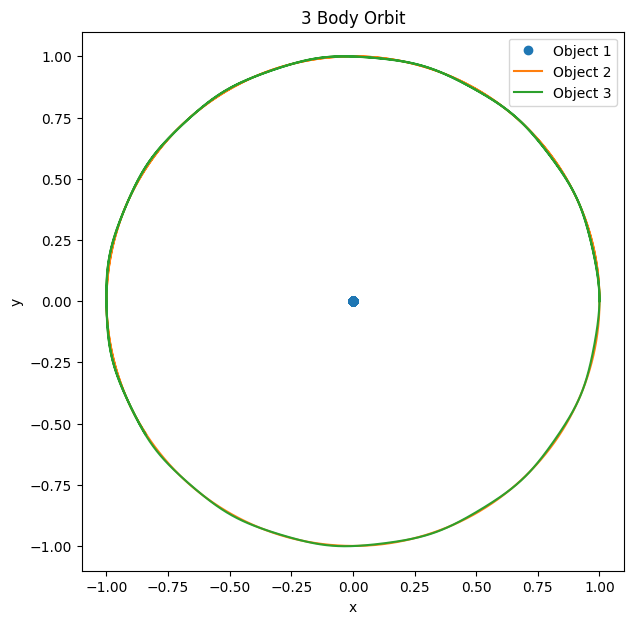

In [6]:
plt.figure(figsize=(7, 7))

M = 10000 #Shortening of length of graph so orbits more visible

# - r23[0] as orbits around r23 and need to adjust based on initial conditions
r2_plot = r2 + r23 - r2[0]
r3_plot = r3 + r23 - r3[0]

plt.plot(r1[:M, 0], r1[:M, 1], 'o', label='Object 1')
plt.plot(r2_plot[:M, 0], r2_plot[:M, 1], label = 'Object 2')
plt.plot(r3_plot[:M, 0], r3_plot[:M, 1], label = 'Object 3')



plt.legend()

# Adding a title and axes labels
plt.title('3 Body Orbit')
plt.xlabel("x");
plt.ylabel("y");

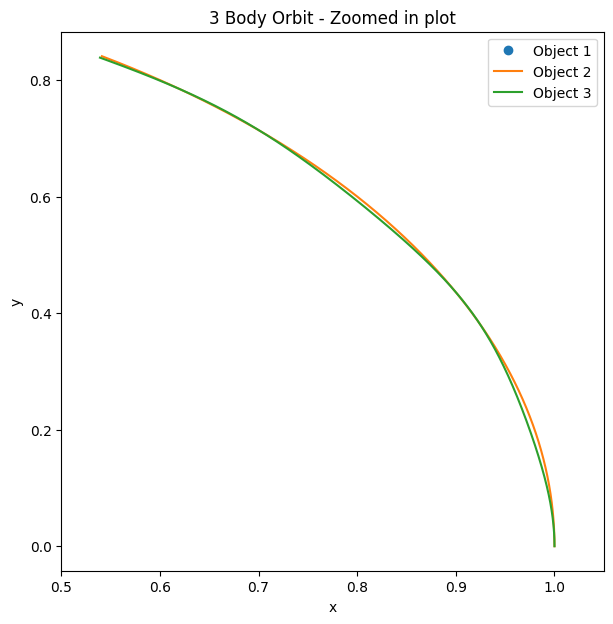

In [7]:
plt.figure(figsize=(7, 7))

M = 1000 #Shortening of length of graph so orbits more visible


plt.plot(r1[:M, 0], r1[:M, 1], 'o', label='Object 1')
plt.plot(r2_plot[:M, 0], r2_plot[:M, 1], label = 'Object 2')
plt.plot(r3_plot[:M, 0], r3_plot[:M, 1], label = 'Object 3')

plt.xlim((0.5, 1.05))
plt.legend()

# Adding a title and axes labels
plt.title('3 Body Orbit - Zoomed in plot')
plt.xlabel("x");
plt.ylabel("y");

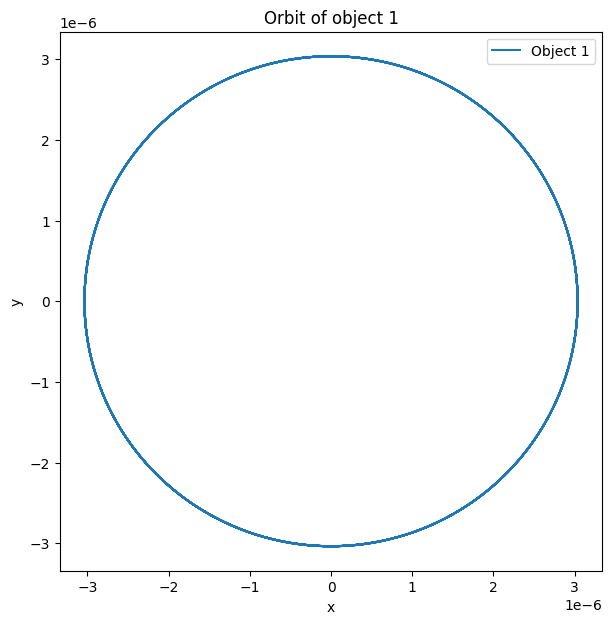

In [8]:
plt.figure(figsize=(7, 7))

plt.plot(r1[:, 0], r1[:, 1], label='Object 1')
plt.legend()

# Adding a title and axes labels
plt.title('Orbit of object 1')
plt.xlabel("x");
plt.ylabel("y");

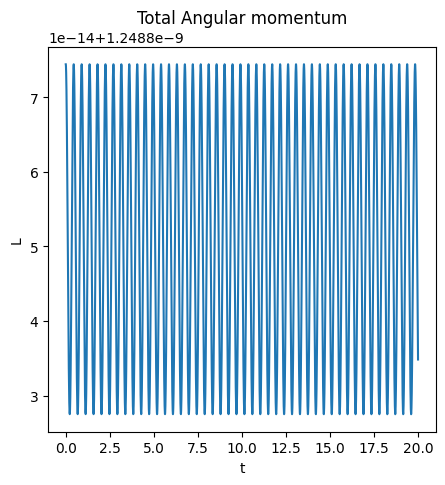

In [9]:
#Plotting total angular momentum
plt.figure(figsize=(5, 5))
M = 20000
plt.plot(t_arr[:M], (L1+L2)[:M])

# Adding a title and axes labels
plt.title('Total Angular momentum')
plt.xlabel("t");
plt.ylabel("L");



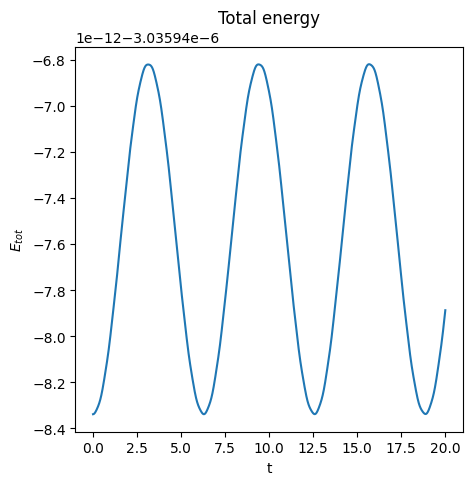

In [10]:
#Plotting total energy
PE_tot = PE1 + PE2
KE_tot = KE1 + KE2
E_tot = PE_tot + KE_tot
L_tot = L1 + L2 + L3 + L23
plt.figure(figsize=(5, 5))
M=20000
plt.plot(t_arr[:M], E_tot[:M])



# Adding a title and axes labels
plt.title('Total energy')
plt.xlabel("t");
plt.ylabel(r"$E_{tot}$");

## Analysis of graph

From the graph of the 3 objects, we can see object 1 hardly moves, object 2 and 3 move in pretty much the same circulat orbit around mass 1. However on closer inspection to the orbits of mass 2 and mass 3, we can see that mass 3 does indeed orbit around mass 2. 

From the graphs of the energy and angular momentum we can see both the energy and angular momentum varies very slightly in a sinosoidal pattern with the same frequency as the orbit of mass 3. 

To investigate this orbit further I will now analyse the eccentricity.

## Eccentricity

21/02/23

REFERENCE [7]

Laplace-Runge-Lenz-Pauli vector:

$$ L = \frac{\textbf{r}_R}{r_R} - \frac{v_R^2 \textbf{r}_R - (\textbf{r}_R \cdot \textbf{v}_R) \textbf{v}_R}{G(M_E + M_M)} $$

_R = relative earth moon position




[[ 1.00000000e+00  0.00000000e+00]
 [ 9.99708568e-01 -3.38534617e-06]
 [ 9.98834667e-01 -2.30134341e-05]
 ...
 [-1.98631018e-03  9.76818631e-01]
 [-1.41051266e-03  9.81669298e-01]
 [-9.61354638e-04  9.85962106e-01]]


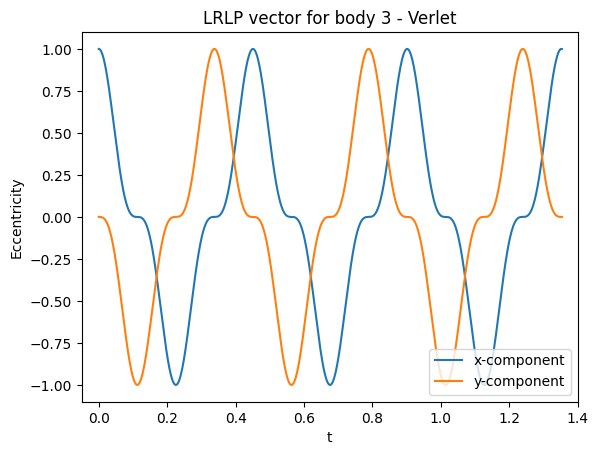

In [11]:
Ecc = np.zeros_like(r2)
for i in range(len(r2)):
    r_R = r3[i] - r2[i] 
    r_R_mag = np.linalg.norm(r_R)
    v_R = v3[i]  - v2[i] 
    v_R_mag = v3[i]  - v2[i] 

    Ecc[i] = r_R / r_R_mag - (v_R**2 * r_R - np.dot(r_R, v_R) * v_R)/(G*(m2 + m3))
print(Ecc)
B = 1355 #Shortening plot of graph to better see shape
plt.plot(t_arr[:B], Ecc[:B, 0], label = "x-component")
plt.plot(t_arr[:B], Ecc[:B, 1], label = "y-component")
plt.legend(loc='lower right')
plt.xlim([-0.05, 1.4])

# Adding a title and axes labels
plt.title('LRLP vector for body 3 - Verlet')
plt.xlabel("t");
plt.ylabel("Eccentricity");

## Analysis of eccentricity graph

From this eccentricity graph we can see that the eccentricity of the orbit does change with time showing that mass 3 is orbitting around something else (mass 2) in a regular manor that repeats periodically.